<a href="https://colab.research.google.com/github/jnn-dev/ML_Transfer_Learning/blob/main/Program9_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###################################################################
Load Datasets 
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data Directory List 1- >  /content/drive/My Drive/Colab Notebooks/Program9/cats_dogs_horse_humans/train
Data Directory List 2- >  /content/drive/My Drive/Colab Notebooks/Program9/cats_dogs_horse_humans/validation
Data Directory List 3- >  /content/drive/My Drive/Colab Notebooks/Program9/cats_dogs_horse_humans/test

###################################################################
Create Model
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 254, 254, 128)     3584      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 252, 252, 128)     147584    
_____________________________________

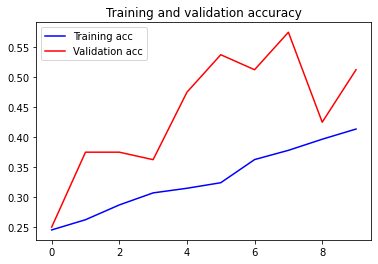

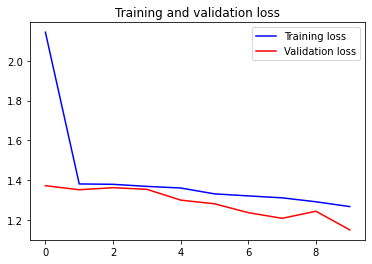


###################################################################
Test Model
(array([0, 1, 2, 3]), array([20, 20, 20, 20]))
3/3 [==============================] - 29s 9s/step - loss: 1.3721 - acc: 0.3000
Testing accuracy - > 30.000001192092896
The Predicted Testing image is = humans verify below


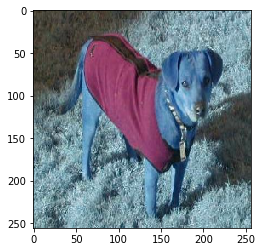

The Predicted Testing image is = dogs verify below


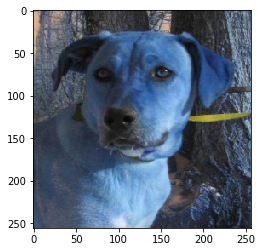

The Predicted Testing image is = humans verify below


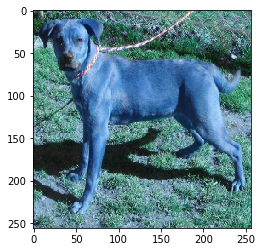

The Predicted Testing image is = horses verify below


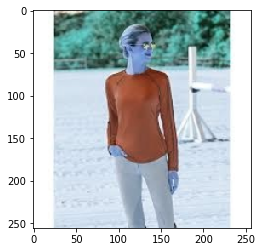

The Predicted Testing image is = dogs verify below


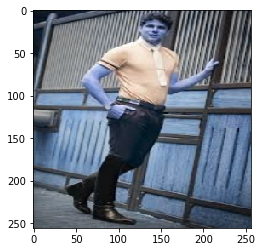

The Predicted Testing image is = cats verify below


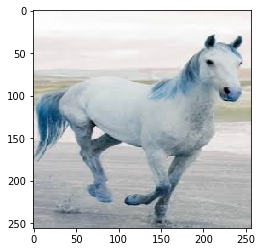

The Predicted Testing image is = humans verify below


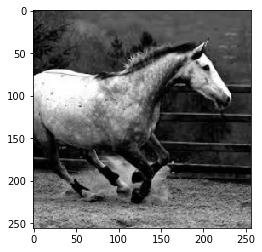

The Predicted Testing image is = humans verify below


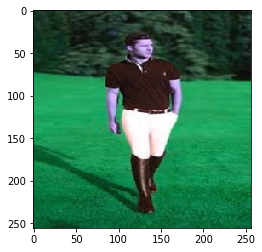

The Predicted Testing image is = cats verify below


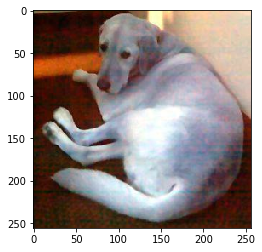

The Predicted Testing image is = dogs verify below


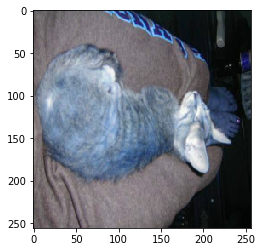

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thur Nov 7, 2019
Reference from https://github.com/anujshah1003/own_data_cnn_implementation_keras/blob/master/updated_custom_data_cnn.py
@author: Jose Tenorio
"""

# Import library
import numpy as np
import tensorflow as tf
import random as rn
import os,cv2
import glob
import re
import matplotlib.pyplot as plt
import warnings
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from google.colab import drive

# Settings
os.environ['PYTHONHASHSEED'] = '0'
# Setting the seed for numpy-generated random numbers
np.random.seed(37)
# Setting the seed for python random numbers
rn.seed(1254)
# Setting the graph-level random seed.
tf.random.set_seed(89)
session_conf = tf.compat.v1.ConfigProto(
intra_op_parallelism_threads=1,
inter_op_parallelism_threads=1)
#Force Tensorflow to use a single thread
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
#K.set_session(sess)
tf.compat.v1.keras.backend.set_session(sess)
warnings.filterwarnings('ignore')

# Define Functions
def sorted_aphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

def gen_image(arr):
    two_d = (np.reshape(arr, (256, 256,3)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt
  
def unique(list1):       
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    for x in unique_list: 
        print(x)
        

print('')
print('###################################################################')
print('Load Datasets ')

# Mount google drive
drive.mount('/content/drive')

# Define train and validation dataset directory
train_dir       = '/content/drive/My Drive/Colab Notebooks/Program9/cats_dogs_horse_humans/train'  
validation_dir  = '/content/drive/My Drive/Colab Notebooks/Program9/cats_dogs_horse_humans/validation'   
test_dir        = '/content/drive/My Drive/Colab Notebooks/Program9/cats_dogs_horse_humans/test'  

print('Data Directory List 1- > ',train_dir)
print('Data Directory List 2- > ',validation_dir)
print('Data Directory List 3- > ',test_dir)

print('')
print('###################################################################')
print('Create Model')
# Create the model
model = Sequential()

# Add new layers
model.add(Conv2D(128, kernel_size=(3,3), strides = 1, activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(128, kernel_size=(3,3), strides = 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(256, kernel_size=(3,3), strides = 1, activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), strides = 1, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Show a summary of the model and check the number of trainable parameters
model.summary()

train_datagen = ImageDataGenerator( 
    rescale=1./255, rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest') 

validation_datagen = ImageDataGenerator(rescale=1./255) 

# Change the batchsize according to your system RAM 
train_batchsize = 50 
val_batchsize = 10 

# Train directory
train_generator = train_datagen.flow_from_directory( 
    train_dir, 
    target_size=(image_size, image_size), 
    batch_size=train_batchsize,
    class_mode='categorical') 

# Validation directory 
validation_generator = validation_datagen.flow_from_directory( 
    validation_dir, 
    target_size=(image_size, image_size), 
    batch_size=val_batchsize, 
    class_mode='categorical', shuffle=False) 

# Compile the model 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc']) 
print('')
print('###################################################################')
print('Train Model')
# Train the model (w augmentation)
history = model.fit_generator( 
    train_generator, 
    steps_per_epoch=train_generator.samples/train_generator.batch_size, 
    epochs=10, 
    validation_data=validation_generator, 
    validation_steps=validation_generator.samples/validation_generator.batch_size,
    verbose=1)

# Extract training history
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss'] 
epochs   = range(len(acc))

# Plot training history 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend() 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend() 
plt.show()

print('')
print('###################################################################')
print('Test Model')
# Test Model
data_dir_list = sorted_aphanumeric(os.listdir(test_dir))

img_rows    = 256
img_cols    = 256

labels_name={'cats':0, 'dogs':1, 'horses':2, 'humans':3}
num_classes = 4

img_data_list = []
labels_list   = []

# Read testing dataset 
for dataset in data_dir_list:
    img_list = glob.glob(test_dir+'/'+ dataset +'/*.jpg')    
    label = labels_name[dataset] # label is generated as the library updated above
    for img in img_list:
        input_img=cv2.imread(img,1 )
        # input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        labels_list.append(label)

# print(unique(labels_list))
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
labels = np.array(labels_list)

# print(unique(labels))
print(np.unique(labels,return_counts = True))
Y = np_utils.to_categorical(labels, num_classes)

# Shuffle the dataset
x_testing, y_testing = shuffle(img_data,Y, random_state = 2)

# Normalize test data
x_testing = x_testing/255

# Reshaping test data
Nv_testing = x_testing.shape[0]
x_testing  = x_testing.reshape(int(Nv_testing),img_rows,img_cols,3)

# Evaluate test data
score = model.evaluate(x_testing,y_testing, verbose = 1)
print('Testing accuracy - >',score[1]*100)
ytested = model.predict_classes(x_testing)

# Plot predicted vs actual 
for i in range(10):
  print("The Predicted Testing image is = %s verify below" % ((list(labels_name.keys())[list(labels_name.values()).index(ytested[i])])))
  gen_image(x_testing[i]).show() # printing image vs the predicted image below